# DSLabs functions

In [53]:
%run "scripts/dslabs_functions.py"


# Data functions

In [54]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [55]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_0_2024_agg_time_mv_input.csv'


file_tag = "Google Merch Store 2024-2025"


# test_data=True
test_data=False


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

 
target='Sessions'
series: Series = data[target]

test_split_threshold = 0.70

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 57 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         427 non-null    int64  
 1   Seven-day active users           427 non-null    int64  
 2   28-day active users              427 non-null    int64  
 3   New users                        427 non-null    int64  
 4   Views                            427 non-null    int64  
 5   Event count                      427 non-null    int64  
 6   Events per session               427 non-null    float64
 7   Item-list view events            427 non-null    int64  
 8   Item view events                 427 non-null    int64  
 9   Add to baskets                   427 non-null    int64  
 10  Checkouts                        427 non-null    int64  
 11  E-commerce purchases             427 non-null    float64
 12  Ave

# Scale 0 - no scaling

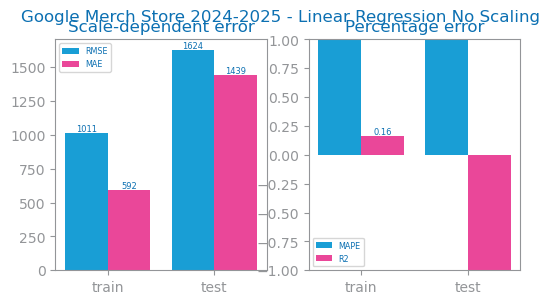

In [56]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


data_0 = data.copy()

# Split the data into train and test sets
train_0, test_0 = series_train_test_split(data_0, trn_pct=test_split_threshold)


# Ensure no data leakage
assert not set(train_0.index).intersection(set(test_0.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data from dataframes with features and target
# trnX_0 = train_0.drop(columns=[target])
# trnY_0 = train_0[target]
# tstX_0 = test_0.drop(columns=[target])
# tstY_0 = test_0[target]


# Prepare the training and testing data using the time index as the feature
trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0[target].to_numpy()
tstX_0 = arange(len(train_0), len(data_0)).reshape(-1, 1)
tstY_0 = test_0[target].to_numpy()



# Fit the linear regression model
model_0 = LinearRegression()
model_0.fit(trnX_0, trnY_0)

# Predict the training and testing data
prd_trn_0 = Series(model_0.predict(trnX_0), index=train_0.index)
prd_tst_0 = Series(model_0.predict(tstX_0), index=test_0.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_0[target], test_0[target], prd_trn_0, prd_tst_0, title=f"{file_tag} - Linear Regression No Scaling")
savefig(f"images/{file_tag}_linear_regression_eval_no_scale.png")

## no scaling plot

<Axes: xlabel='Date', ylabel='Sessions'>

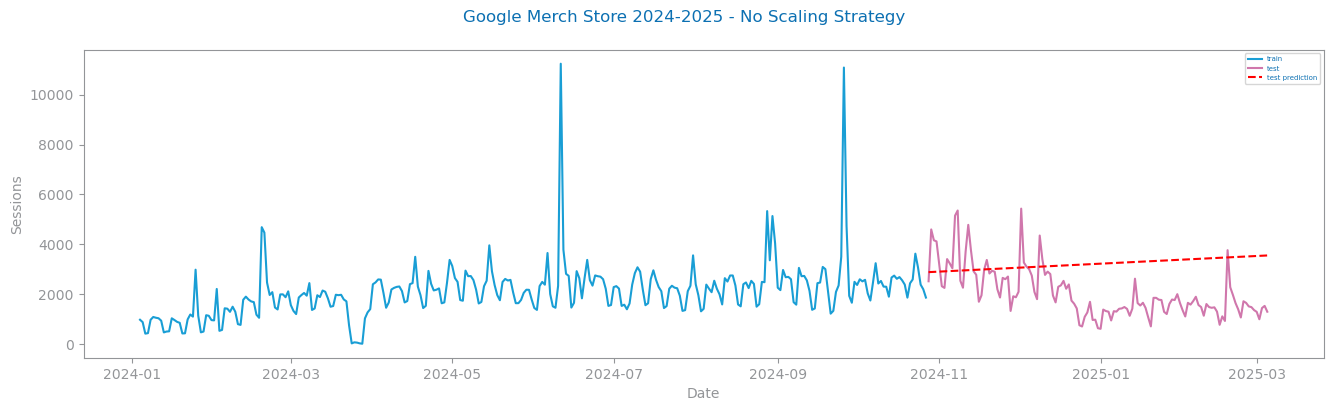

In [57]:
plot_forecasting_series(
    train_0[target],
    test_0[target],
    prd_tst_0,
    title=f"{file_tag} - No Scaling Strategy",
    xlabel='Date',
    ylabel=target,
)

# Scale 1 - Standard Scaler

## Scale 1 strategy Application

In [58]:
from sklearn.preprocessing import StandardScaler

def apply_strategy_1(df):

    df_copy=df.copy()
    
    # Apply scaling to the entire DataFrame
    transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(df_copy)
    df_zscore = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    
    return df_zscore


data_1=apply_strategy_1(data)

series_1: Series = data_1[target]

data_1



,Sessions,Seven-day active users,28-day active users,New users,Views,Event count,Events per session,Item-list view events,Item view events,Add to baskets,...,Sessions other,Sessions referral,season,commercial_season,week_of_month,day_of_week_nr,is_weekend,is_holiday,is_major_event_day,is_commercial_event_day
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-04,-1.035100,-2.697404,-3.064131,-1.219037,-0.390290,-0.411171,1.571703,-0.551882,-0.181153,-0.013906,...,-0.591469,-0.432707,-0.423466,0.323359,-1.704564,0.0,-0.632456,-0.170046,-0.138178,-0.068599
2024-01-05,-1.123294,-2.517432,-3.010950,-1.246160,-0.408282,-0.486284,1.610270,-0.558458,-0.267646,0.092839,...,-0.591469,-0.451646,-0.423466,0.323359,-1.704564,0.5,-0.632456,-0.170046,-0.138178,-0.068599
2024-01-06,-1.551266,-2.430615,-2.985296,-1.518988,-0.907511,-0.952154,0.629416,-0.784082,-0.637859,-0.520423,...,-0.591469,-0.599367,-0.423466,-0.395778,-1.704564,1.0,1.581139,-0.170046,-0.138178,-0.068599
2024-01-07,-1.532699,-2.338838,-2.958176,-1.511010,-0.873634,-0.869573,1.543969,-0.771331,-0.618374,-0.426236,...,-0.591469,-0.580429,-0.423466,-0.395778,-0.939213,1.5,1.581139,-0.170046,-0.138178,-0.068599
2024-01-08,-1.036028,-2.154732,-2.903774,-1.244564,-0.449614,-0.528151,0.869172,-0.564901,-0.260043,-0.198094,...,-0.591469,-0.409980,-0.423466,-0.395778,-0.939213,-1.5,-0.632456,-0.170046,-0.138178,-0.068599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,-0.741739,-0.856895,-0.697224,-0.186758,-0.668918,-0.628742,-0.653082,-0.526111,-0.613622,-0.480655,...,-0.591469,-0.474372,0.528218,-0.395778,-1.704564,1.0,1.581139,-0.170046,-0.138178,-0.068599
2025-03-02,-1.016533,-0.871778,-0.704554,-0.823356,-0.638122,-0.631474,0.166045,-0.485040,-0.568949,-0.442980,...,-0.591469,-0.500886,0.528218,-0.395778,-0.939213,1.5,1.581139,-0.170046,-0.138178,-0.068599
2025-03-03,-0.599701,-0.939578,-0.725402,-0.852075,-0.102909,-0.100776,1.208169,0.042443,-0.226776,-0.051581,...,-0.591469,0.063487,0.528218,-0.395778,-0.939213,-1.5,-0.632456,-0.170046,-0.138178,-0.068599


## Scale 1 evaluate

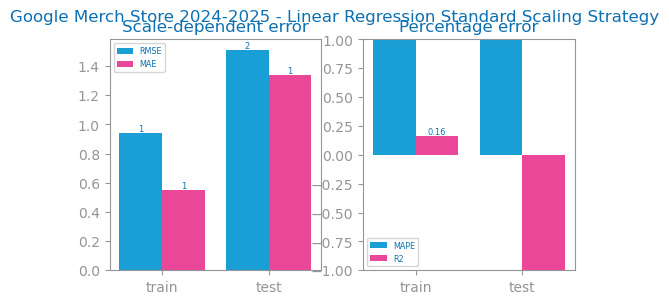

In [59]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


# Split the data into train and test sets
train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Ensure no data leakage
assert not set(train_1.index).intersection(set(test_1.index)), "Data leakage detected: Train and test sets overlap."

# Prepare the training and testing data using the time index as the feature
trnX_1 = arange(len(train_1)).reshape(-1, 1)
trnY_1 = train_1[target].to_numpy()
tstX_1 = arange(len(train_1), len(data_1)).reshape(-1, 1)
tstY_1 = test_1[target].to_numpy()


# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Linear Regression Standard Scaling Strategy")
savefig(f"images/{file_tag}_linear_regression_eval_no_scale.png")

## Scale 1 Plot

<Axes: xlabel='Date', ylabel='Sessions'>

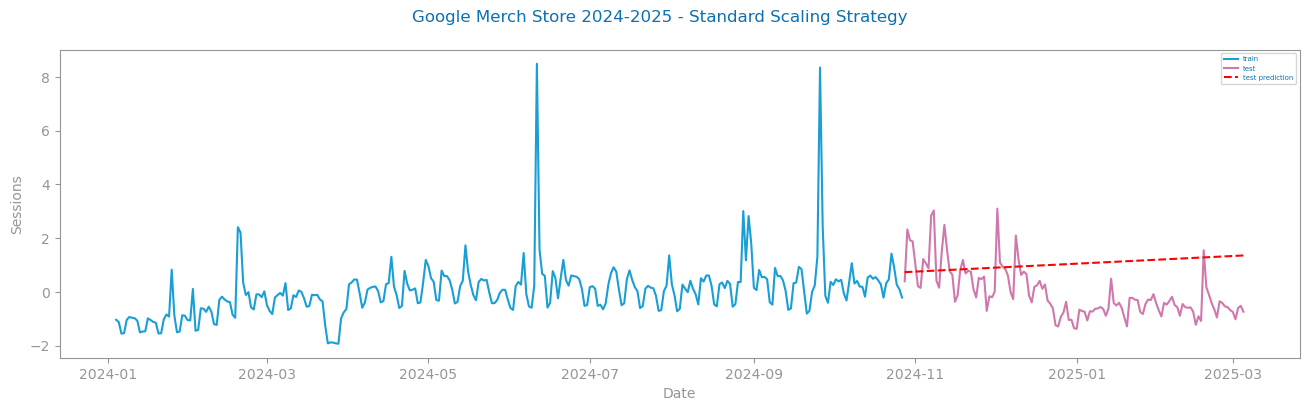

In [60]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - Standard Scaling Strategy",
    xlabel='Date',
    ylabel=target,
)

# Scale 2 - MinMax Scaler


## Scale 2 strategy aplication

In [61]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler



def apply_strategy_2(df):

    df_copy=df.copy()
    
    # Apply MinMax scaling to the entire DataFrame including the target column
    transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_copy)
    df_minmax = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    
    return df_minmax

data_2=apply_strategy_2(data)

series_2: Series = data_2[target]

## Scale 2 evaluate

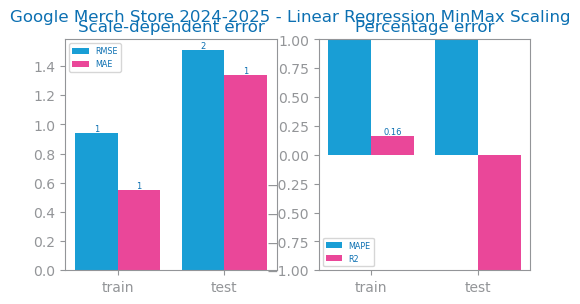

In [62]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# Split the data into train and test sets
train_2, test_2 = series_train_test_split(data_1, trn_pct=test_split_threshold)


# Ensure no data leakage
assert not set(train_1.index).intersection(set(test_1.index)), "Data leakage detected: Train and test sets overlap."

# Prepare the training and testing data using the time index as the feature
trnX_2 = arange(len(train_2)).reshape(-1, 1)
trnY_2 = train_2[target].to_numpy()
tstX_2 = arange(len(train_2), len(data_2)).reshape(-1, 1)
tstY_2 = test_2[target].to_numpy()

# Fit the linear regression model
model_2 = LinearRegression()
model_2.fit(trnX_2, trnY_2)

# Predict the training and testing data
prd_trn_2 = Series(model_2.predict(trnX_2), index=train_2.index)
prd_tst_2 = Series(model_2.predict(tstX_2), index=test_2.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_2[target], test_2[target], prd_trn_2, prd_tst_2, title=f"{file_tag} - Linear Regression MinMax Scaling")
savefig(f"images/{file_tag}_linear_regression_eval_no_scale.png")

## Scale 2 Plot Forecast

<Axes: xlabel='Date', ylabel='Sessions'>

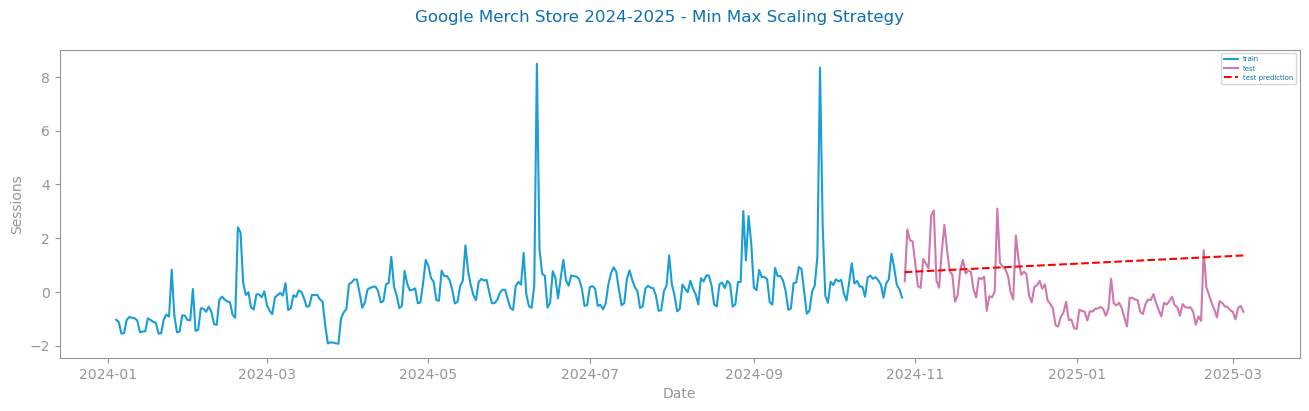

In [63]:
plot_forecasting_series(
    train_2[target],
    test_2[target],
    prd_tst_2,
    title=f"{file_tag} - Min Max Scaling Strategy",
    xlabel='Date',
    ylabel=target,
)

# scaling plot

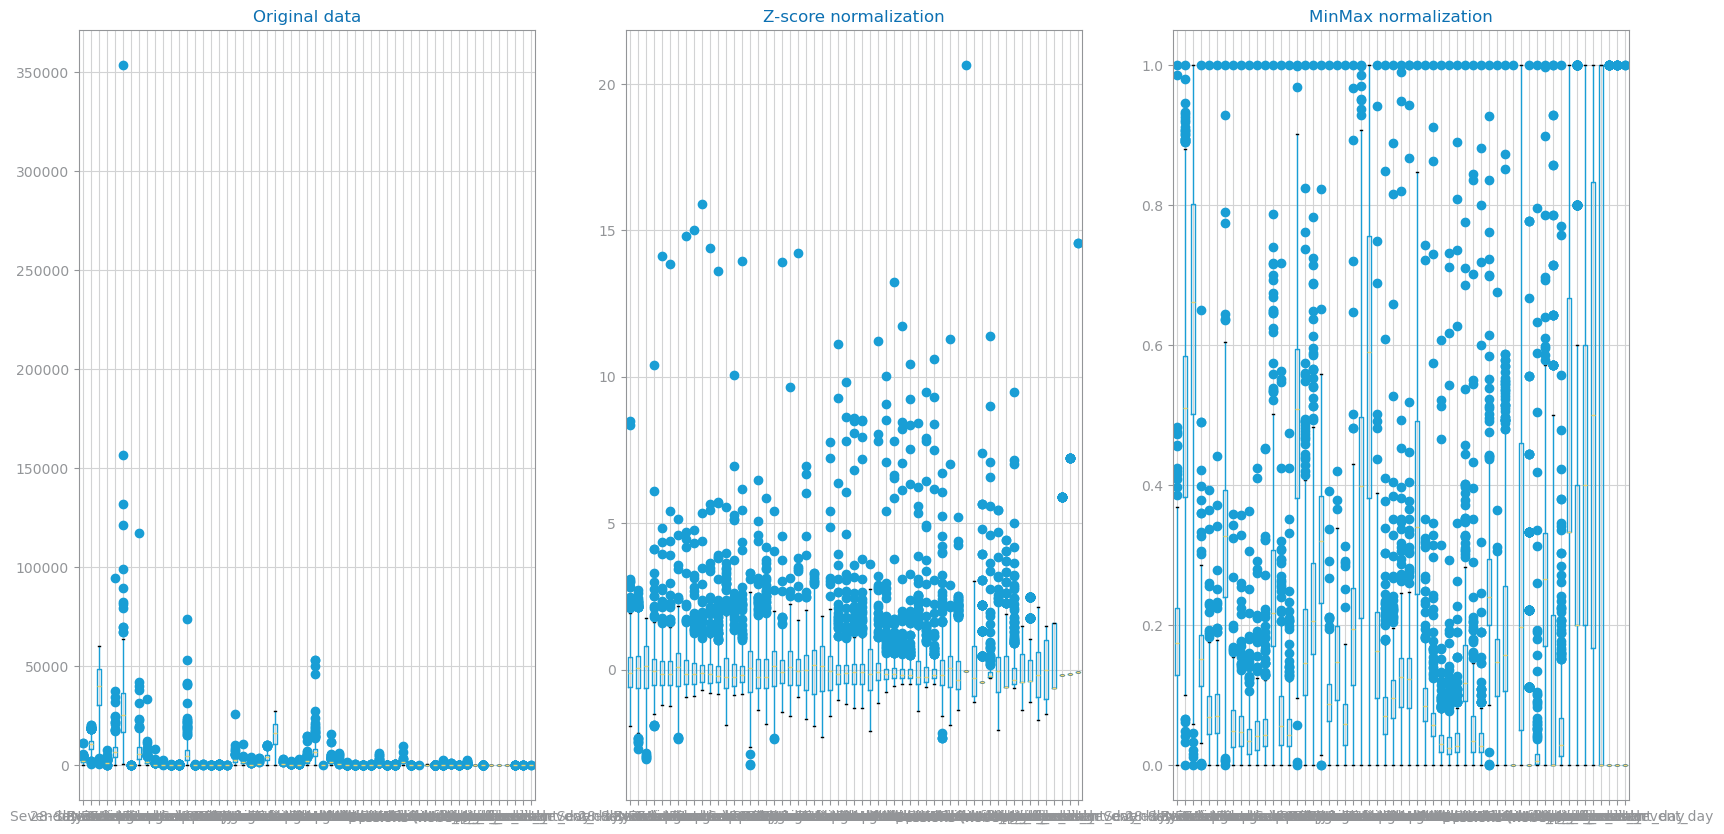

In [64]:

from matplotlib.pyplot import subplots, show

fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
axs[0, 0].set_title("Original data")
data.boxplot(ax=axs[0, 0])

axs[0, 1].set_title("Z-score normalization")
data_1.boxplot(ax=axs[0, 1])

axs[0, 2].set_title("MinMax normalization")
data_2.boxplot(ax=axs[0, 2])

savefig(f"images/{file_tag}_scaling_plots_evaluation.png")

show()

# Approach uplift comparison

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calculate performance metrics for each model
metrics = {
    "Model": ["No Scaling", "Standard Scaling", "MinMax Scaling"],
    "MAE": [
        mean_absolute_error(test_0[target], prd_tst_0),
        mean_absolute_error(test_1[target], prd_tst_1),
        mean_absolute_error(test_2[target], prd_tst_2)
    ],
    "MSE": [
        mean_squared_error(test_0[target], prd_tst_0),
        mean_squared_error(test_1[target], prd_tst_1),
        mean_squared_error(test_2[target], prd_tst_2)
    ],
    "RMSE": [
        mean_squared_error(test_0[target], prd_tst_0, squared=False),
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
        mean_squared_error(test_2[target], prd_tst_2, squared=False)
    ],
    "R²": [
        r2_score(test_0[target], prd_tst_0),
        r2_score(test_1[target], prd_tst_1),
        r2_score(test_2[target], prd_tst_2)
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_0[target], prd_tst_0),
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
        mean_absolute_percentage_error(test_2[target], prd_tst_2)
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

              Model          MAE           MSE         RMSE        R²  \
0        No Scaling  1439.091566  2.636562e+06  1623.749405 -1.608578   
1  Standard Scaling     1.335990  2.272309e+00     1.507418 -1.608578   
2    MinMax Scaling     1.335990  2.272309e+00     1.507418 -1.608578   

          MAPE  
0   101.243601  
1  1161.996648  
2  1161.996648  


# save to csv

In [66]:
if test_data==False:
    

    data_save=data.copy()

    # apply winning strategy
    data_save=apply_strategy_1(data_save)

    data_save.reset_index(inplace=True)

        
    data_save.to_csv(f"data/df_merch_0_2024_agg_time_scaling_input.csv", index=False)
    

    print(data_save.columns)

Index(['Date', 'Sessions', 'Seven-day active users', '28-day active users',
       'New users', 'Views', 'Event count', 'Events per session',
       'Item-list view events', 'Item view events', 'Add to baskets',
       'Checkouts', 'E-commerce purchases', 'Average purchase revenue',
       'Purchase revenue', 'First time purchasers', 'Average session duration',
       'ARPU', 'ARPPU', 'Views per user', 'Total users', 'Promotion views',
       'Promotion clicks', 'Sessions Mobile', 'Seven-day active users Mobile',
       '28-day active users Mobile', 'New users Mobile',
       'Scrolled users Mobile', 'Engaged sessions Mobile', 'Views Mobile',
       'Event count Mobile', 'Events per session Mobile',
       'Item-list view events Mobile', 'Item view events Mobile',
       'Add to baskets Mobile', 'Checkouts Mobile',
       'E-commerce purchases Mobile', 'Average purchase revenue Mobile',
       'Purchase revenue Mobile', 'First time purchasers Mobile',
       'Average session duration M